In [1]:
filepath = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(filepath)

In [4]:
df

ao_hechos mes_hechos         fecha_hechos  \
0           2017.0    Octubre  2017-10-06 12:00:00   
1           2017.0  Noviembre  2017-11-15 20:00:00   
2           2017.0  Noviembre  2017-11-15 18:30:00   
3           2017.0  Noviembre  2017-11-15 17:32:00   
4           2017.0  Noviembre  2017-11-14 19:00:00   
...            ...        ...                  ...   
1118984     2020.0  Noviembre  2020-11-15 22:30:00   
1118985     2020.0    Octubre  2020-10-01 09:46:00   
1118986     2020.0  Noviembre  2020-11-16 23:00:00   
1118987     2020.0  Noviembre  2020-11-11 08:30:00   
1118988        NaN        NaN                  NaN   

                                             delito  \
0                                            FRAUDE   
1               PERDIDA DE LA VIDA POR OTRAS CAUSAS   
2        ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA   
3                 ROBO DE MOTOCICLETA CON VIOLENCIA   
4              ROBO A CASA HABITACION SIN VIOLENCIA   
...                                             ...   
1118984                ROBO A NEGOCIO SIN VIOLENCIA   
1118985                                      FRAUDE   
1118986                  ROBO DE ACCESORIOS DE AUTO   
1118987                                    AMENAZAS   
1118988                        HOMICIDIO POR GOLPES   

                             categoria_delito  \
0                      DELITO DE BAJO IMPACTO   
1                          HECHO NO DELICTIVO   
2                      DELITO DE BAJO IMPACTO   
3        ROBO DE VEHÍCULO CON Y SIN VIOLENCIA   
4                      DELITO DE BAJO IMPACTO   
...                                       ...   
1118984                DELITO DE BAJO IMPACTO   
1118985                DELITO DE BAJO IMPACTO   
1118986                DELITO DE BAJO IMPACTO   
1118987                DELITO DE BAJO IMPACTO   
1118988                      HOMICIDIO DOLOSO   

                                                  fiscalia agencia  \
0                            INVESTIGACIÓN EN AZCAPOTZALCO    AZ-1   
1                                 INVESTIGACIÓN EN TLALPAN   TLP-2   
2                              INVESTIGACIÓN EN IZTAPALAPA   IZP-4   
3                          INVESTIGACIÓN EN MIGUEL HIDALGO    MH-2   
4                              INVESTIGACIÓN EN IZTAPALAPA   IZP-9   
...                                                    ...     ...   
1118984  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...    AO-4   
1118985                   UNIDAD DE RECEPCIÓN POR INTERNET   CEN-1   
1118986  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN VENUS...    VC-3   
1118987  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...    AO-4   
1118988  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...   MIL-1   

                  unidad_investigacion        alcaldia_hechos  \
0                               UI-3SD             IZTAPALAPA   
1                               UI-3CD                TLALPAN   
2                               UI-3SD             IZTAPALAPA   
3                               UI-1SD         MIGUEL HIDALGO   
4                               UI-3SD             IZTAPALAPA   
...                                ...                    ...   
1118984                         UI-3SD  CUAJIMALPA DE MORELOS   
1118985  Unidad de Investigación 1 S/D             CUAUHTEMOC   
1118986                         UI-1SD    VENUSTIANO CARRANZA   
1118987                         UI-3SD         ALVARO OBREGON   
1118988                         UI-3CD             MILPA ALTA   

                               colonia_hechos  ao_inicio mes_inicio  \
0                                    APATLACO       2017  Noviembre   
1                   MIGUEL HIDALGO 2A SECCIÓN       2017  Noviembre   
2                    DR. ALFONSO ORTIZ TIRADO       2017  Noviembre   
3                           LOMAS DE SOTELO I       2017  Noviembre   
4        2A. AMPLIACIÓN SANTIAGO ACAHUALTEPEC       2017  Noviembre   
...                                       ...        ...      

In [5]:
from pandas_profiling import ProfileReport as pf

In [6]:
pf(df)

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Algunas observaciones del perfilado

- Existen algunos casos sin fecha de hechos. Son muy pocos, sin embargo como son expedientes de investigación se puede aproximar el dato utilizando la fecha_inicio del expediente.
- En este análisis tomaremos en cuenta todos los tipos de delito, no solo los violentos. Esto nos permitiría aproximar un "índice de criminialidad" para la zona.
- Geopoint es equivalente a longitud y latitud, y tiene relativamente pocos valores faltantes. Aunque podríamos aproximar esto incluso con el API de Google Maps o algo similar, considero que para fines de este proyecto podemos borrar los registros con localización faltante.

#### De esta manera, los registros que nos interesarán son:
 - fecha_hechos
 - fecha_inicio
 - longitud
 - latitud

In [7]:
df_datapoints = df[["fecha_hechos", "fecha_inicio", "longitud", "latitud"]]

In [8]:
df_datapoints['fecha'] = df_datapoints.apply(lambda row :
                                             row["fecha_inicio"] if pd.isna(row["fecha_hechos"])
                                             else row["fecha_hechos"] , axis = 1) 

<ipython-input-8-f3298b08eff5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datapoints['fecha'] = df_datapoints.apply(lambda row :


In [9]:
df_data = df_datapoints.drop(["fecha_hechos", "fecha_inicio"],axis=1).dropna() 

In [10]:
df_data["fecha"] = pd.to_datetime(df_data["fecha"], errors='coerce').dropna() 

In [11]:
df_data = df_data[df_data['fecha'].isnull() == False]

In [12]:
import pytz
utc=pytz.UTC

df_data["fecha"] = df_data["fecha"].apply(lambda x: utc.localize(x) if x.tzinfo is None else x)

In [13]:
df_data

longitud    latitud                      fecha
0       -99.116256  19.380585  2017-10-06 12:00:00+00:00
1       -99.193514  19.286033  2017-11-15 20:00:00+00:00
2       -99.073700  19.387269  2017-11-15 18:30:00+00:00
3       -99.217985  19.453354  2017-11-15 17:32:00+00:00
4       -99.012944  19.347705  2017-11-14 19:00:00+00:00
...            ...        ...                        ...
1118984 -99.273099  19.363112  2020-11-15 22:30:00+00:00
1118985 -99.146313  19.436319  2020-10-01 09:46:00+00:00
1118986 -99.117306  19.448413  2020-11-16 23:00:00+00:00
1118987 -99.259939  19.326082  2020-11-11 08:30:00+00:00
1118988 -99.070894  19.186315  2020-11-17 23:59:11+00:00

[1074352 rows x 3 columns]

Aunque normalmente preferiría utilizar los datos más actuales, el COVID-19 generó una disminución en tráfico

In [14]:
import datetime
df_data = df_data.loc[df_data['fecha'] <= utc.localize(datetime.datetime(2020, 2, 1))]

Por buena medida guardaré los datos ya procesados

df_data.to_csv("datos_crimen.csv")

import pandas as pd
df_data = pd.read_csv("datos_crimen.csv")

df_data = df_data.drop("Unnamed: 0", axis=1)

df_data

Ahora que tenemos estos datos, comenzaremos por filtrarlos por fecha. Como se estipula en el documento, nos interesan aquellos datos que:
 - Sean más recientes que un año para generar el diámetro de densidad.
 - Sean más recientes que tres meses para predecir el diámetro de densidad.
 
 Por lo tanto, el paso más evidente es generar primero un filtrado de aquellos datos que sucedieron en el último año.

In [15]:
last_date = sorted(df_data['fecha'])[-1]
last_date

datetime.datetime(2020, 2, 1, 0, 0, tzinfo=<UTC>)

In [16]:
from datetime import timedelta
delta = timedelta(days=365)

In [17]:
df_filtrado = df_data.loc[last_date - df_data['fecha'] <= delta].reset_index()

In [18]:
df_filtrado = df_filtrado.drop("index", axis=1).reset_index()

In [19]:
df_filtrado

index   longitud    latitud                      fecha
0            0 -99.200780  19.430980  2019-12-13 11:50:00+00:00
1            1 -99.202480  19.434240  2019-08-09 12:00:00+00:00
2            2 -99.187820  19.347300  2019-12-10 13:15:00+00:00
3            3 -99.142670  19.301580  2019-12-12 16:00:00+00:00
4            4 -99.142330  19.455640  2019-12-13 14:30:00+00:00
...        ...        ...        ...                        ...
230817  230817 -99.229739  19.381029  2019-10-01 13:00:00+00:00
230818  230818 -99.180165  19.388140  2020-01-15 12:00:00+00:00
230819  230819 -99.155792  19.342873  2019-11-13 12:00:00+00:00
230820  230820 -99.149612  19.291095  2020-01-28 23:30:00+00:00
230821  230821 -99.153926  19.507596  2020-01-19 12:00:00+00:00

[230822 rows x 4 columns]

Ahora, debido a que los algoritmos que utilizamos tienden a funcionar con distancia euclidiana, hacemos una transformación a coordenadas geodeticas.

In [20]:
import numpy as np

def transformacion_coordenadas(row):
    lon = row["longitud"] * np.pi/180
    lat = row["latitud"] * np.pi/180
    r = 6371
    x = r * np.cos(lat) * np.cos(lon)
    y = r * np.cos(lat) * np.sin(lon)
    z = r * np.sin(lat)
    return np.array([x, y, z])
df_filtrado['coordenadas'] = df_filtrado.apply(transformacion_coordenadas , axis = 1)
df_filtrado

index   longitud    latitud                      fecha  \
0            0 -99.200780  19.430980  2019-12-13 11:50:00+00:00   
1            1 -99.202480  19.434240  2019-08-09 12:00:00+00:00   
2            2 -99.187820  19.347300  2019-12-10 13:15:00+00:00   
3            3 -99.142670  19.301580  2019-12-12 16:00:00+00:00   
4            4 -99.142330  19.455640  2019-12-13 14:30:00+00:00   
...        ...        ...        ...                        ...   
230817  230817 -99.229739  19.381029  2019-10-01 13:00:00+00:00   
230818  230818 -99.180165  19.388140  2020-01-15 12:00:00+00:00   
230819  230819 -99.155792  19.342873  2019-11-13 12:00:00+00:00   
230820  230820 -99.149612  19.291095  2020-01-28 23:30:00+00:00   
230821  230821 -99.153926  19.507596  2020-01-19 12:00:00+00:00   

                                              coordenadas  
0       [-960.6671309061106, -5930.8264169883, 2119.44...  
1       [-960.8238145839389, -5930.678861546381, 2119....  
2       [-959.8188139585604, -5934.0929577689385, 2110...  
3       [-955.409665794706, -5936.508421427849, 2105.8...  
4       [-954.4713028444708, -5930.902182730007, 2122....  
...                                                   ...  
230817  [-963.9606284520709, -5932.161692910911, 2114....  
230818  [-958.785756711413, -5932.734427362697, 2114.9...  
230819  [-956.5275107331651, -5934.789558141525, 2110....  
230820  [-956.1902298392251, -5936.772974791965, 2104....  
230821  [-955.3651315602141, -5928.8066932363545, 2127...  

[230822 rows x 5 columns]

In [21]:
np.linalg.norm(df_filtrado['coordenadas'][0]-df_filtrado['coordenadas'][1])

0.4039562160712466

Como prueba de sanidad, usaremos la distancia Havershine.

https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b

In [22]:
import haversine as hs

In [23]:
hs.haversine((df_filtrado['latitud'][0], df_filtrado['longitud'][0]),(df_filtrado['latitud'][1],df_filtrado['longitud'][1]))

0.40395677410679953

Podemos ver que la conversión da resultados sumamente similares.

In [24]:
delta = timedelta(days=30)
df_pred = df_filtrado.loc[(last_date - df_filtrado['fecha']) <= delta]
df_pred

index   longitud    latitud                      fecha  \
13282    13282 -99.093556  19.508080  2020-01-08 11:37:00+00:00   
13289    13289 -99.183925  19.500449  2020-01-31 19:50:00+00:00   
13294    13294 -99.163939  19.476089  2020-01-13 10:47:00+00:00   
13298    13298 -99.216852  19.416904  2020-01-19 10:00:00+00:00   
13300    13300 -99.233300  19.380567  2020-01-27 20:30:00+00:00   
...        ...        ...        ...                        ...   
230798  230798 -99.094935  19.329762  2020-01-15 10:00:00+00:00   
230800  230800 -99.159489  19.357827  2020-01-18 12:00:00+00:00   
230818  230818 -99.180165  19.388140  2020-01-15 12:00:00+00:00   
230820  230820 -99.149612  19.291095  2020-01-28 23:30:00+00:00   
230821  230821 -99.153926  19.507596  2020-01-19 12:00:00+00:00   

                                              coordenadas  
13282   [-949.1148280074103, -5929.792272523198, 2127....  
13289   [-958.5115722628248, -5928.567573175353, 2126....  
13294   [-956.5874130766584, -5929.793692991419, 2124....  
13298   [-962.4141359942215, -5931.070508316927, 2117....  
13300   [-964.3320515490245, -5932.118594912807, 2114....  
...                                                   ...  
230798  [-950.2996312207995, -5936.278843346512, 2108....  
230800  [-956.822759033745, -5934.183893820725, 2111.7...  
230818  [-958.785756711413, -5932.734427362697, 2114.9...  
230820  [-956.1902298392251, -5936.772974791965, 2104....  
230821  [-955.3651315602141, -5928.8066932363545, 2127...  

[17272 rows x 5 columns]

In [25]:
sorted(df_pred['fecha'])[0]

datetime.datetime(2020, 1, 2, 0, 0, tzinfo=<UTC>)

In [30]:
import pickle

diccionario_fechas = {}
for index, row in df_pred.iterrows():
    diccionario_fechas[row['index']] = row['fecha']
diccionario_fechas[-1] = last_date

f = open("diccionario_fechas", "wb")
pickle.dump(diccionario_fechas, f)
f.close()

In [26]:
from annoy import AnnoyIndex

In [28]:
t_a = AnnoyIndex(3,'euclidean')
#t_a.load('t_a.tree')

True

In [33]:
vectores = df_filtrado['coordenadas']
for i in range(df_filtrado.shape[0]):
    t_a.add_item(i, vectores[i])

In [34]:
t_a.build(8)

True

In [29]:
t_pred = AnnoyIndex(3,'euclidean')
#t_pred.load('t_pred.tree')

True

In [36]:
for index, row in df_pred.iterrows():
    t_pred.add_item(row['index'], row['coordenadas'])

In [37]:
t_pred.build(20)

True

Guardamos los índices para poder usarlos en un futuro.

In [38]:
t_a.save('t_a.tree')
t_pred.save('t_pred.tree')

True

In [30]:
print(t_a.get_nns_by_item(3000, 10, include_distances=True))

([3000, 110531, 83046, 75288, 73933, 65030, 113369, 26827, 121477, 45243], [0.0, 0.0, 0.0006573687423951924, 0.018948934972286224, 0.025802860036492348, 0.027342183515429497, 0.028895361348986626, 0.03407074138522148, 0.03441349044442177, 0.04890679568052292])


In [31]:
print(t_pred.get_nns_by_vector(t_a.get_item_vector(3000), 10, include_distances=True))

([83046, 75288, 73933, 84149, 72775, 70403, 71983, 13342, 78657, 86776], [0.0006573687423951924, 0.018948934972286224, 0.025802860036492348, 0.08021034300327301, 0.08161240071058273, 0.09708544611930847, 0.1046607717871666, 0.10473945736885071, 0.11286593973636627, 0.11938776075839996])


Ahora que podemos usar Annoy para buscar vecinos cercanos de forma rápida, toca generar el dataset.

In [32]:
import multiprocessing

reg = df_filtrado[['coordenadas']].to_records(index=False)
reg = [{"coordenadas" : r[0], 'index':0} for r in reg]

def dens_multiproc(row):
    index = AnnoyIndex(3,'euclidean')
    index.load('t_a.tree')
    res = calculo_densidad(row,index)
    index.unload()
    return res

def calculo_densidad(row, index=t_a):
    maximo = 0.2 #200 metros
    vec = 2
    continuar = True
    lista_indices = []
    lista_distancias = []
    while(continuar):
        lista_indices, lista_distancias = index.get_nns_by_vector(row['coordenadas'], vec, include_distances=True)
        if(lista_distancias[-1] > maximo):
            continuar = False
        vec += 1
    idx = row['index']
    #if idx % 100 == 0:
    #    print(idx)
    return np.log(vec-2)

#pool = multiprocessing.Pool()
#df_filtrado['densidad'] = pool.map(dens_multiproc, reg)

In [33]:
df_filtradoin = pd.read_csv('df_filtrado.csv')
df_filtrado['densidad'] = df_filtradoin['densidad']

In [43]:
df_filtrado.to_csv("df_filtrado.csv", index=False)

In [34]:
dens_max = max(df_filtrado.densidad)

In [35]:
dens_max

7.029087564149663

In [36]:
df_filtrado['score'] = df_filtrado['densidad']/dens_max

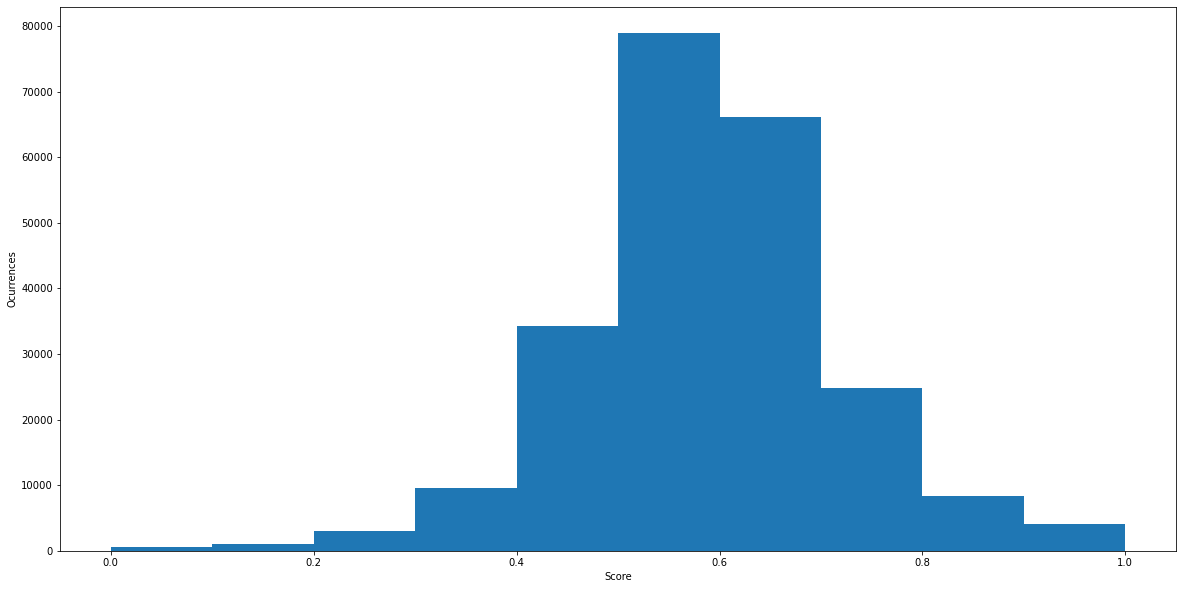

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(df_filtrado['score'], bins = 10)
plt.ylabel("Ocurrences")
plt.xlabel("Score")
plt.savefig("Dens_a.png")

In [48]:
df_filtrado

index   longitud    latitud                      fecha  \
0            0 -99.200780  19.430980  2019-12-13 11:50:00+00:00   
1            1 -99.202480  19.434240  2019-08-09 12:00:00+00:00   
2            2 -99.187820  19.347300  2019-12-10 13:15:00+00:00   
3            3 -99.142670  19.301580  2019-12-12 16:00:00+00:00   
4            4 -99.142330  19.455640  2019-12-13 14:30:00+00:00   
...        ...        ...        ...                        ...   
230817  230817 -99.229739  19.381029  2019-10-01 13:00:00+00:00   
230818  230818 -99.180165  19.388140  2020-01-15 12:00:00+00:00   
230819  230819 -99.155792  19.342873  2019-11-13 12:00:00+00:00   
230820  230820 -99.149612  19.291095  2020-01-28 23:30:00+00:00   
230821  230821 -99.153926  19.507596  2020-01-19 12:00:00+00:00   

                                              coordenadas  densidad     score  
0       [-960.6671309061106, -5930.8264169883, 2119.44...  4.127134  0.587151  
1       [-960.8238145839389, -5930.678861546381, 2119....  5.159055  0.733958  
2       [-959.8188139585604, -5934.0929577689385, 2110...  4.418841  0.628651  
3       [-955.409665794706, -5936.508421427849, 2105.8...  3.526361  0.501681  
4       [-954.4713028444708, -5930.902182730007, 2122....  5.164786  0.734773  
...                                                   ...       ...       ...  
230817  [-963.9606284520709, -5932.161692910911, 2114....  3.610918  0.513711  
230818  [-958.785756711413, -5932.734427362697, 2114.9...  3.828641  0.544685  
230819  [-956.5275107331651, -5934.789558141525, 2110....  4.248495  0.604416  
230820  [-956.1902298392251, -5936.772974791965, 2104....  2.944439  0.418893  
230821  [-955.3651315602141, -5928.8066932363545, 2127...  3.850148  0.547745  

[230822 rows x 7 columns]

Es evidente que existe un problema de desbalance en los datos. Aquellos puntos con densidad no baja (mayor o igual a 0.3) son pocos en número, por lo que cualquier modelo que intente predecir el score tenderá por ignorar a los mismos.

Por esto, una de las estrategias que pueden funcionar es generar un enriquecimiento de datos que genere más puntos de alta densidad.

In [49]:
df_baja_densidad = df_filtrado[df_filtrado['score'] <= 0.3]
df_alta_densidad = df_filtrado[df_filtrado['score'] >= 0.8]

In [50]:
df_alta_densidad

index   longitud    latitud                      fecha  \
7            7 -99.120370  19.437130  2019-12-13 16:10:00+00:00   
8            8 -99.148810  19.423910  2019-09-20 21:00:00+00:00   
16          16 -99.166550  19.368200  2019-12-09 20:30:00+00:00   
38          38 -99.121860  19.472240  2019-12-13 17:52:00+00:00   
94          94 -99.171970  19.394290  2019-11-07 05:50:00+00:00   
...        ...        ...        ...                        ...   
230765  230765 -99.149797  19.421401  2019-06-19 12:00:00+00:00   
230789  230789 -99.148087  19.420887  2019-11-19 12:00:00+00:00   
230802  230802 -99.178571  19.373218  2019-09-28 16:40:00+00:00   
230808  230808 -99.149800  19.420075  2019-03-25 00:00:00+00:00   
230815  230815 -99.155754  19.400469  2019-10-24 10:00:00+00:00   

                                              coordenadas  densidad     score  
7       [-952.3066858211037, -5931.944139885184, 2120....  5.777652  0.821963  
8       [-955.3287701013152, -5931.953504557602, 2118....  6.845880  0.973936  
16      [-957.4931101792283, -5933.688384049694, 2112....  5.971262  0.849507  
38      [-952.2548070893753, -5930.635528060715, 2123....  6.445720  0.917007  
94      [-957.9009568158966, -5932.647361977193, 2115....  5.676754  0.807609  
...                                                   ...       ...       ...  
230765  [-955.4457177948747, -5932.028630371572, 2118....  6.650279  0.946108  
230789  [-955.2717021390953, -5932.0758957166645, 2118...  6.194405  0.881253  
230802  [-958.7084804600323, -5933.304660880193, 2113....  5.713733  0.812870  
230808  [-955.4537699593877, -5932.077016031836, 2118....  6.665684  0.948300  
230815  [-956.1855472013557, -5932.692931808838, 2116....  5.857933  0.833385  

[12434 rows x 7 columns]

In [51]:
df_baja_densidad

index   longitud    latitud                      fecha  \
31          31 -99.109180  19.234870  2019-11-22 14:00:00+00:00   
36          36 -99.216050  19.437370  2019-10-17 07:00:00+00:00   
40          40 -99.159460  19.253220  2019-12-13 19:05:00+00:00   
99          99 -99.159520  19.240290  2019-12-14 01:40:00+00:00   
100        100 -99.172700  19.241140  2019-12-13 23:05:00+00:00   
...        ...        ...        ...                        ...   
230642  230642 -99.211255  19.464684  2020-01-07 00:00:00+00:00   
230674  230674 -99.192041  19.246559  2020-01-18 20:30:00+00:00   
230683  230683 -99.045835  19.383920  2020-01-01 11:09:00+00:00   
230719  230719 -99.312836  19.357165  2019-10-10 17:00:00+00:00   
230736  230736 -99.161788  19.484589  2020-01-01 11:07:00+00:00   

                                              coordenadas  densidad     score  
31      [-952.327078011476, -5939.482794895603, 2098.8...  1.098612  0.156295  
36      [-962.2098686518664, -5930.336816988684, 2120....  1.609438  0.228968  
40      [-957.4318611067393, -5937.980857542596, 2100....  1.609438  0.228968  
99      [-957.5135222408796, -5938.447747730332, 2099....  1.609438  0.228968  
100     [-958.8745790467448, -5938.196581382583, 2099....  1.791759  0.254906  
...                                                   ...       ...       ...  
230642  [-961.5516218179129, -5929.418998339989, 2122....  1.386294  0.197223  
230674  [-960.8473652959974, -5937.676520289523, 2100....  1.098612  0.156295  
230683  [-944.8982545523529, -5935.119823212604, 2114....  1.386294  0.197223  
230719  [-972.705525875757, -5931.625864897948, 2111.7...  1.791759  0.254906  
230736  [-956.3145729872454, -5929.518433742568, 2125....  1.791759  0.254906  

[4645 rows x 7 columns]

In [52]:
registros_b = df_baja_densidad[['fecha','coordenadas','score']].to_records(index=False)
registros_b = [list(r)[0:2] for r in registros_b]
registros_b[0]

[datetime.datetime(2019, 11, 22, 14, 0, tzinfo=<UTC>),
 array([ -952.32707801, -5939.4827949 ,  2098.87071198])]

Lo que se hará es que para cada uno de estos puntos de densidad no baja se generará una ligera variación en sus coordenadas (sumar o restar una cierta cantidad aleatoria de metros en cada punto) y fecha. Esto nos permitirá generar un remuestreo de estos puntos que deberían tener una mayor densidad.

Al remuestrear, asumimos que las densidades de los puntos nuevos serán en promedio más bajas que las de los originales. Por lo tanto, para cada punto de densidad no baja generaremos 100 remuestreos.

In [53]:
def flatten(t):
    flat_list = []
    for sublist in t:
        for item in sublist:
            flat_list.append(item)
    return flat_list

def generate_records_b(r):
    n = 20
    f = r[0]
    c = r[1]
    delta_rad = 0.1
    nuevos = []
    index = AnnoyIndex(3,'euclidean')
    index.load('t_a.tree')
    for r in range(n):
        d = np.random.uniform(low=-0.05, high=0.05, size=c.shape)
        d[1] = 0.0
        n_c = c + d
        n_f = f + timedelta(minutes=np.random.randint(low=-24*60, high=24*60))
        s = calculo_densidad({'coordenadas':n_c, 'index':0}, index)
        nuevos.append([n_f,n_c,s])
    index.unload()
    return nuevos

pool = multiprocessing.Pool()
new_records_b = flatten(pool.map(generate_records_b, registros_b))

In [54]:
registros_a = df_alta_densidad[['fecha','coordenadas','score']].to_records(index=False)
registros_a = [list(r)[0:2] for r in registros_a]
registros_a[0]

[datetime.datetime(2019, 12, 13, 16, 10, tzinfo=<UTC>),
 array([ -952.30668582, -5931.94413989,  2120.09237945])]

In [55]:
def generate_records_a(r):
    n = 3
    f = r[0]
    c = r[1]
    delta_rad = 0.1
    nuevos = []
    index = AnnoyIndex(3,'euclidean')
    index.load('t_a.tree')
    for r in range(n):
        d = np.random.uniform(low=-0.05, high=0.05, size=c.shape)
        d[1] = 0.0
        n_c = c + d
        n_f = f + timedelta(minutes=np.random.randint(low=-24*60, high=24*60))
        s = calculo_densidad({'coordenadas':n_c, 'index':0}, index)
        nuevos.append([n_f,n_c,s])
    index.unload()
    return nuevos

pool = multiprocessing.Pool()
new_records_a = flatten(pool.map(generate_records_a, registros_a))

In [56]:
new_records = new_records_a + new_records_b

In [57]:
len(new_records_b)

92900

In [58]:
df_enriquecido = pd.DataFrame(new_records, columns =['fecha', 'coordenadas', 'score'])
dens_max = max(dens_max, max(df_enriquecido['score']))
df_enriquecido['score'] = df_enriquecido['score']/dens_max
df_enriquecido.to_csv('df_enriquecido.csv', index=False)

In [40]:
df_enriquecido = pd.read_csv('df_enriquecido.csv')

In [41]:
df_enriquecido

fecha  \
0       2019-12-13 15:56:00+00:00   
1       2019-12-13 12:40:00+00:00   
2       2019-12-13 03:28:00+00:00   
3       2019-09-21 01:33:00+00:00   
4       2019-09-20 10:28:00+00:00   
...                           ...   
130197  2020-01-01 02:30:00+00:00   
130198  2020-01-01 18:00:00+00:00   
130199  2019-12-31 17:04:00+00:00   
130200  2020-01-02 11:04:00+00:00   
130201  2020-01-01 21:02:00+00:00   

                                           coordenadas     score  
0       [ -952.32807069 -5931.94413989  2120.13450875]  0.822738  
1       [ -952.3058417  -5931.94413989  2120.05112945]  0.812297  
2       [ -952.29481023 -5931.94413989  2120.05120383]  0.807994  
3       [ -955.36596207 -5931.95350456  2118.72326822]  0.945066  
4       [ -955.35116846 -5931.95350456  2118.65705362]  0.852629  
...                                                ...       ...  
130197  [ -956.31379852 -5929.51843374  2125.07713536]  0.254874  
130198  [ -956.32861867 -5929.51843374  2125.10593278]  0.254874  
130199  [ -956.33323565 -5929.51843374  2125.03211272]  0.276802  
130200  [ -956.32455113 -5929.51843374  2125.09329751]  0.254874  
130201  [ -956.29213547 -5929.51843374  2125.04482959]  0.312551  

[130202 rows x 3 columns]

In [42]:
df = df_filtrado.drop(['index','longitud','latitud','densidad'],axis=1).append(df_enriquecido).reset_index().drop('index',axis=1).reset_index()
df

index                      fecha  \
0            0  2019-12-13 11:50:00+00:00   
1            1  2019-08-09 12:00:00+00:00   
2            2  2019-12-10 13:15:00+00:00   
3            3  2019-12-12 16:00:00+00:00   
4            4  2019-12-13 14:30:00+00:00   
...        ...                        ...   
361019  361019  2020-01-01 02:30:00+00:00   
361020  361020  2020-01-01 18:00:00+00:00   
361021  361021  2019-12-31 17:04:00+00:00   
361022  361022  2020-01-02 11:04:00+00:00   
361023  361023  2020-01-01 21:02:00+00:00   

                                              coordenadas     score  
0       [-960.6671309061106, -5930.8264169883, 2119.44...  0.587151  
1       [-960.8238145839389, -5930.678861546381, 2119....  0.733958  
2       [-959.8188139585604, -5934.0929577689385, 2110...  0.628651  
3       [-955.409665794706, -5936.508421427849, 2105.8...  0.501681  
4       [-954.4713028444708, -5930.902182730007, 2122....  0.734773  
...                                                   ...       ...  
361019     [ -956.31379852 -5929.51843374  2125.07713536]  0.254874  
361020     [ -956.32861867 -5929.51843374  2125.10593278]  0.254874  
361021     [ -956.33323565 -5929.51843374  2125.03211272]  0.276802  
361022     [ -956.32455113 -5929.51843374  2125.09329751]  0.254874  
361023     [ -956.29213547 -5929.51843374  2125.04482959]  0.312551  

[361024 rows x 4 columns]

In [43]:
dens_max

7.029087564149663

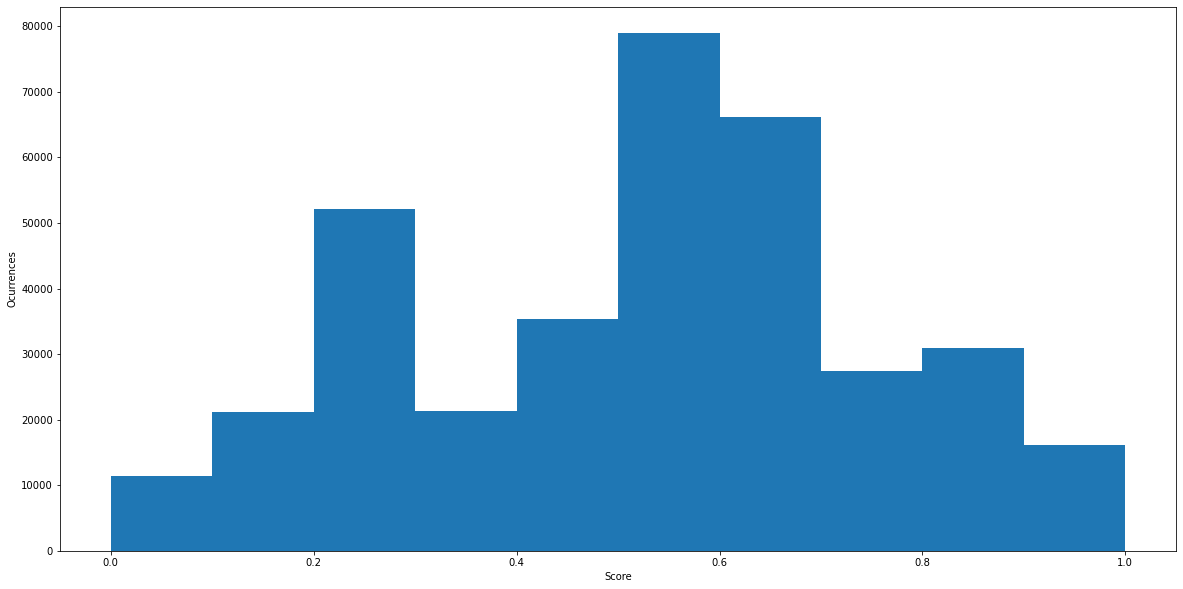

In [45]:
plt.figure(figsize=(20,10))
plt.hist(df['score'], bins = 10)
plt.ylabel("Ocurrences")
plt.xlabel("Score")
plt.savefig("Dens_b.png")

Como se puede notar, los datos se encuentran ahora mucho menos sesgados a densidades bajas. Procederemos a construir el dataset.

Ahora generaremos los puntos cercanos para su predicción.

In [63]:
df["fecha"] = pd.to_datetime(df["fecha"], utc=True)

In [64]:
last_date = sorted(df['fecha'])[-1]
last_date

Timestamp('2020-02-01 22:28:00+0000', tz='UTC')

In [ ]:
[f for f in df_enriquecido['coordenadas'] if len(f) > 3]

In [65]:
datos = []
vecinos_cercanos = 10
for index, row in df.iterrows():
    d = [index, row['score']]
    l_v, l_d = t_pred.get_nns_by_vector(row['coordenadas'], vecinos_cercanos, include_distances=True)
    for i in range(vecinos_cercanos):
        d.append(l_d[i])
        d.append((last_date - df['fecha'][l_v[i]]).days/30)
    if index % 100 == 0:
        print(index)
    datos.append(d)
columnas = ["index", "score"]
for i in range(vecinos_cercanos):
    columnas.append("v_"+str(i)+"_dist")
    columnas.append("v_"+str(i)+"_tiem")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300
147400
147500
147600

250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500
264600
264700
264800
264900
265000
265100

In [66]:
df_final = pd.DataFrame(datos, columns=columnas).drop('index',axis=1)

In [67]:
df_final

score  v_0_dist  v_0_tiem  v_1_dist  v_1_tiem  v_2_dist  v_2_tiem  \
0       0.587151  0.112671  0.700000  0.238930  0.466667  0.240804  0.233333   
1       0.733958  0.018951  0.166667  0.089886  0.433333  0.098781  0.066667   
2       0.628651  0.040814  0.033333  0.041370  0.033333  0.050244  0.833333   
3       0.501681  0.121885  0.366667  0.147557  0.400000  0.175356  0.433333   
4       0.734773  0.025289  0.733333  0.056600  0.766667  0.077926  0.100000   
...          ...       ...       ...       ...       ...       ...       ...   
361019  0.254874  0.208194  0.366667  0.230433  0.033333  0.493439  0.266667   
361020  0.254874  0.229212  0.366667  0.254242  0.033333  0.515213  0.266667   
361021  0.276802  0.184383  0.033333  0.223806  0.366667  0.446496  0.266667   
361022  0.254874  0.221931  0.366667  0.242994  0.033333  0.504732  0.266667   
361023  0.312551  0.183609  0.366667  0.208533  0.033333  0.472497  0.266667   

        v_3_dist  v_3_tiem  v_4_dist  ...  v_5_dist  v_5_tiem  v_6_dist  \
0       0.266376  0.266667  0.275522  ...  0.277959  0.500000  0.283555   
1       0.113784  0.066667  0.115626  ...  0.122973  0.466667  0.126062   
2       0.054075  0.066667  0.057232  ...  0.061261  0.766667  0.064387   
3       0.176455  0.100000  0.204137  ...  0.270742  0.100000  0.271145   
4       0.096454  0.966667  0.144502  ...  0.154292  0.700000  0.179372   
...          ...       ...       ...  ...       ...       ...       ...   
361019  0.576054  0.700000  0.597056  ...  0.622809  0.900000  0.647953   
361020  0.599310  0.700000  0.626039  ...  0.627384  0.266667  0.628585   
361021  0.529780  0.700000  0.569909  ...  0.630796  0.400000  0.656477   
361022  0.588381  0.700000  0.615068  ...  0.628181  0.900000  0.636306   
361023  0.552670  0.700000  0.561224  ...  0.613589  0.900000  0.654078   

        v_6_tiem  v_7_dist  v_7_tiem  v_8_dist  v_8_tiem  v_9_dist  v_9_tiem  
0       0.466667  0.286049  0.600000  0.302431  0.633333  0.303229  0.166667  
1       0.600000  0.127179  0.133333  0.127710  0.500000  0.154003  0.900000  
2       0.533333  0.095195  0.233333  0.105247  0.966667  0.167678  0.733333  
3       0.833333  0.297303  0.766667  0.311252  0.866667  0.313011  0.233333  
4       0.333333  0.181094  0.166667  0.203732  0.933333  0.207678  0.333333  
...          ...       ...       ...       ...       ...       ...       ...  
361019  0.733333  0.652337  0.966667  0.652337  0.766667  0.652337  0.300000  
361020  0.900000  0.630442  0.966667  0.630442  0.766667  0.630442  0.300000  
361021  0.900000  0.694656  0.733333  0.699051  0.966667  0.699051  0.766667  
361022  0.733333  0.640703  0.966667  0.640703  0.766667  0.640703  0.300000  
361023  0.400000  0.672274  0.733333  0.676626  0.966667  0.676626  0.766667  

[361024 rows x 21 columns]

In [68]:
df_final.to_csv("datos_preparados.csv", index = False)

In [69]:
df.to_csv('datos_enriquecidos.csv', index = False)

Con el dataset ya preparado, generaré una red neuronal que pueda predecir el score dados los k vecinos más cercanos.